In [1]:
from shapely.wkt import loads
import pandas as pd

In [2]:
import numpy as np

def convert_to_bounding_box(x):
    return loads(x).bounds if x is not None and not pd.isna(x) else None

bounding_boxes_df = pd.read_csv('../data/bounding_boxes.csv')
bounding_boxes_df['bounding_box'] = bounding_boxes_df['geometry'].apply(convert_to_bounding_box)
bounding_boxes_df['xmin'], bounding_boxes_df['ymin'], bounding_boxes_df['xmax'], bounding_boxes_df['ymax'] = bounding_boxes_df.bounding_box.str
bounding_boxes_df['xmin'] = np.maximum(bounding_boxes_df['xmin'], 0)
bounding_boxes_df['ymin'] = np.maximum(bounding_boxes_df['ymin'], 0)
bounding_boxes_df = bounding_boxes_df.drop(columns=['bounding_box', 'geometry'])
bounding_boxes_df

/var/folders/n2/bwdv1zhn55ngx2l75t_7jwkw0000gn/T/ipykernel_55286/1458317651.py:8: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  bounding_boxes_df['xmin'], bounding_boxes_df['ymin'], bounding_boxes_df['xmax'], bounding_boxes_df['ymax'] = bounding_boxes_df.bounding_box.str


,image_id,worm_type,xmin,ymin,xmax,ymax
0,id_8ada71185e18dc8838b4925b.jpg,pbw,2377.970000,156.770000,2478.890000,297.860000
1,id_8ada71185e18dc8838b4925b.jpg,pbw,715.390000,1221.460000,939.820000,1319.680000
2,id_8ada71185e18dc8838b4925b.jpg,abw,1129.730000,1558.060000,1559.700000,1966.300000
3,id_bc86d3cfd0c0463fa5cae33e.jpg,abw,1743.676282,1537.210067,2090.216400,1799.814857
4,id_bc86d3cfd0c0463fa5cae33e.jpg,abw,2162.137567,1676.304250,2342.256859,1952.269926
...,...,...,...,...,...,...
140228,id_23617d0cdd8f04091b50106d.jpg,pbw,2177.440000,1777.340000,2221.630000,1835.630000
140229,id_23617d0cdd8f04091b50106d.jpg,pbw,2376.280000,1610.920000,2471.710000,1685.660000
140230,id_23617d0cdd8f04091b50106d.jpg,pbw,1732.730000,2174.090000,1819.700000,2248.830000
140231,id_23617d0cdd8f04091b50106d.jpg,pbw,1940.040000,2445.330000,2003.500000,2477.770000


In [3]:
# Read in the train data and get image information
from PIL import Image

def get_width_and_height(img_path):
    img = Image.open(f'../data/images/{img_path}')
    return img.size

train_df = pd.read_csv('../data/train.csv')
train_df['size'] = train_df['image_id_worm'].apply(get_width_and_height)
train_df[['image_width','image_height']] = pd.DataFrame(train_df['size'].tolist(),index=train_df.index)
train_df['worm_type'] = pd.Categorical(train_df['worm_type'])
train_df['worm_code'] = train_df['worm_type'].cat.codes + 1
train_df = train_df.drop(columns=['size'])
train_df

,image_id_worm,worm_type,number_of_worms,image_width,image_height,worm_code
0,id_0002ea6f15c7fa6f4c221783.jpg,pbw,51,4624,3472,2
1,id_0005ef295aafe6acc63587db.jpg,pbw,8,3120,4160,2
2,id_00084298dd030a500033ff78.jpg,NaN,0,4032,3024,0
3,id_00093f2c76f6488737325859.jpg,pbw,12,4000,3000,2
4,id_000b2e6c437c643f25d4a6c3.jpg,pbw,87,4000,3008,2
...,...,...,...,...,...,...
9895,id_ffe6e193dd78b7258d864f6b.jpg,abw,5,4160,3120,1
9896,id_ffe98feb1e592e887b81c3f0.jpg,pbw,95,780,1040,2
9897,id_ffef90ecf47baa38434f84fb.jpg,pbw,26,4160,3120,2
9898,id_fff06bb2e59bfce437ac9fc0.jpg,NaN,0,4000,3000,0


In [4]:
# Join the dataframes together
cleaned_train_df = pd.merge(bounding_boxes_df, train_df, left_on=['image_id', 'worm_type'], right_on=['image_id_worm', 'worm_type'])
cleaned_train_df = cleaned_train_df.drop(columns=['image_id_worm'])
cleaned_train_df

,image_id,worm_type,xmin,ymin,xmax,ymax,number_of_worms,image_width,image_height,worm_code
0,id_8ada71185e18dc8838b4925b.jpg,pbw,2377.970000,156.770000,2478.890000,297.860000,2,3072,3072,2
1,id_8ada71185e18dc8838b4925b.jpg,pbw,715.390000,1221.460000,939.820000,1319.680000,2,3072,3072,2
2,id_8ada71185e18dc8838b4925b.jpg,abw,1129.730000,1558.060000,1559.700000,1966.300000,1,3072,3072,1
3,id_bc86d3cfd0c0463fa5cae33e.jpg,abw,1743.676282,1537.210067,2090.216400,1799.814857,2,4000,3000,1
4,id_bc86d3cfd0c0463fa5cae33e.jpg,abw,2162.137567,1676.304250,2342.256859,1952.269926,2,4000,3000,1
...,...,...,...,...,...,...,...,...,...,...
140228,id_23617d0cdd8f04091b50106d.jpg,pbw,2177.440000,1777.340000,2221.630000,1835.630000,157,4160,3120,2
140229,id_23617d0cdd8f04091b50106d.jpg,pbw,2376.280000,1610.920000,2471.710000,1685.660000,157,4160,3120,2
140230,id_23617d0cdd8f04091b50106d.jpg,pbw,1732.730000,2174.090000,1819.700000,2248.830000,157,4160,3120,2
140231,id_23617d0cdd8f04091b50106d.jpg,pbw,1940.040000,2445.330000,2003.500000,2477.770000,157,4160,3120,2


In [5]:
# Remove bounding boxes where the min x value exceeds the image width
cleaned_train_df = cleaned_train_df[cleaned_train_df['xmin'] < cleaned_train_df['image_width']]

# Remove bounding boxes where the min y value exceeds the image height
cleaned_train_df = cleaned_train_df[cleaned_train_df['ymin'] < cleaned_train_df['image_height']]

# Save boxes where xmax and ymax exceed the image width and height
cleaned_train_df['xmax'] = np.minimum(cleaned_train_df['xmax'], cleaned_train_df['image_width'])
cleaned_train_df['ymax'] = np.minimum(cleaned_train_df['ymax'], cleaned_train_df['image_height'])

(3072, 3072, 3)
-----Next point-----
Starting point (2377, 156)
Ending point (2478, 297)
-----Next point-----
Starting point (715, 1221)
Ending point (939, 1319)
-----Next point-----
Starting point (1129, 1558)
Ending point (1559, 1966)


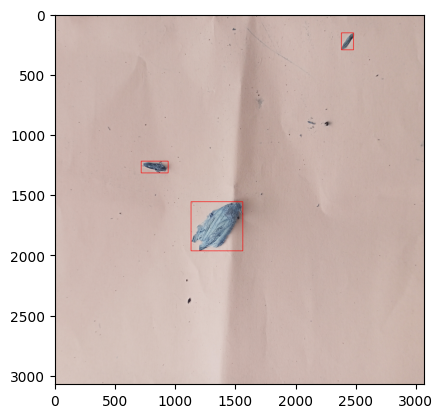

In [6]:
import cv2
import matplotlib.pyplot as plt

def view_all_bounding_boxes(img_name):
    image = cv2.imread(f"../data/images/{img_name}")
    print(image.shape)
    boxes_df = bounding_boxes_df[bounding_boxes_df['image_id'] == img_name]

    for idx, row in boxes_df.iterrows():

        start_point = (int(row['xmin']), int(row['ymin']))
        end_point = (int(row['xmax']), int(row['ymax']))

        print('-----Next point-----')
        print('Starting point', start_point)
        print('Ending point', end_point)
        image = cv2.rectangle(image, start_point, end_point, color=(255, 0, 0), thickness=3)

    plt.imshow(image)

view_all_bounding_boxes('id_8ada71185e18dc8838b4925b.jpg')

In [7]:
# Remove duplicates from the training dataframe
unique_train_df = train_df.drop_duplicates(subset=['image_id_worm'])
unique_train_df

,image_id_worm,worm_type,number_of_worms,image_width,image_height,worm_code
0,id_0002ea6f15c7fa6f4c221783.jpg,pbw,51,4624,3472,2
1,id_0005ef295aafe6acc63587db.jpg,pbw,8,3120,4160,2
2,id_00084298dd030a500033ff78.jpg,NaN,0,4032,3024,0
3,id_00093f2c76f6488737325859.jpg,pbw,12,4000,3000,2
4,id_000b2e6c437c643f25d4a6c3.jpg,pbw,87,4000,3008,2
...,...,...,...,...,...,...
9895,id_ffe6e193dd78b7258d864f6b.jpg,abw,5,4160,3120,1
9896,id_ffe98feb1e592e887b81c3f0.jpg,pbw,95,780,1040,2
9897,id_ffef90ecf47baa38434f84fb.jpg,pbw,26,4160,3120,2
9898,id_fff06bb2e59bfce437ac9fc0.jpg,NaN,0,4000,3000,0


In [8]:
# Convert to RCNN format
rcnn_df = cleaned_train_df[['image_id', 'worm_code', 'xmin', 'ymin', 'xmax', 'ymax']]
rcnn_df

,image_id,worm_code,xmin,ymin,xmax,ymax
0,id_8ada71185e18dc8838b4925b.jpg,2,2377.970000,156.770000,2478.890000,297.860000
1,id_8ada71185e18dc8838b4925b.jpg,2,715.390000,1221.460000,939.820000,1319.680000
2,id_8ada71185e18dc8838b4925b.jpg,1,1129.730000,1558.060000,1559.700000,1966.300000
3,id_bc86d3cfd0c0463fa5cae33e.jpg,1,1743.676282,1537.210067,2090.216400,1799.814857
4,id_bc86d3cfd0c0463fa5cae33e.jpg,1,2162.137567,1676.304250,2342.256859,1952.269926
...,...,...,...,...,...,...
140228,id_23617d0cdd8f04091b50106d.jpg,2,2177.440000,1777.340000,2221.630000,1835.630000
140229,id_23617d0cdd8f04091b50106d.jpg,2,2376.280000,1610.920000,2471.710000,1685.660000
140230,id_23617d0cdd8f04091b50106d.jpg,2,1732.730000,2174.090000,1819.700000,2248.830000
140231,id_23617d0cdd8f04091b50106d.jpg,2,1940.040000,2445.330000,2003.500000,2477.770000


In [9]:
# Split train and test
from sklearn.model_selection import train_test_split

train, validation = train_test_split(unique_train_df, test_size=0.1, random_state=1)

In [10]:
import os
import shutil

def generate_dataset_folders(df, dataset_type):
    print('Generating', dataset_type, 'dataset')

    # Remove/create output directory
    dataset_path = f'../data/rcnn/{dataset_type}/'
    images_path = '../data/images/'
    if os.path.exists(dataset_path):
        shutil.rmtree(dataset_path)
    os.mkdir(dataset_path)
    
    for idx, row in df.iterrows():
        img_name = row['image_id_worm']
        img_prefix = img_name.split('.')[0]

        shutil.copy(f'{images_path}{img_name}', f'{dataset_path}{img_name}')
        
        if 'worm_code' in df.columns:
            if row['worm_code'] == -1:
                # Create an empty txt file
                open(f'{dataset_path}{img_prefix}.txt', 'a').close()
            else:
                # Retrieve the bounding boxes in the yolo format
                boxes_df = rcnn_df[rcnn_df['image_id'] == f'{img_name}']
                boxes_df = boxes_df.drop(columns=['image_id'])
                boxes_df.to_csv(f'{dataset_path}{img_prefix}.txt', sep ='\t', header=False, index=False)

In [11]:
generate_dataset_folders(train, 'training')

Generating training dataset


In [12]:
generate_dataset_folders(validation, 'validation')

Generating validation dataset


In [13]:
validation.to_csv('../data/rcnn/validation_set.csv', index=False)

In [14]:
test_df = pd.read_csv('../data/test.csv')
generate_dataset_folders(test_df, 'testing')

Generating testing dataset


In [15]:
bounding_boxes_df[bounding_boxes_df['image_id'] == 'id_0a9a21ea4faa8cad663e55ac.jpg']

,image_id,worm_type,xmin,ymin,xmax,ymax
6495,id_0a9a21ea4faa8cad663e55ac.jpg,abw,2073.0,1849.0,2569.0,2324.0
6496,id_0a9a21ea4faa8cad663e55ac.jpg,abw,3485.0,1173.0,4015.0,1745.0
6497,id_0a9a21ea4faa8cad663e55ac.jpg,abw,93.0,2165.0,507.0,2487.0
6498,id_0a9a21ea4faa8cad663e55ac.jpg,abw,1325.0,1620.0,1811.0,1947.0
6499,id_0a9a21ea4faa8cad663e55ac.jpg,abw,2749.0,1198.0,3346.0,1767.0
6500,id_0a9a21ea4faa8cad663e55ac.jpg,abw,2340.0,496.0,2902.0,1227.0
6501,id_0a9a21ea4faa8cad663e55ac.jpg,abw,1680.0,840.0,2187.0,1140.0
6502,id_0a9a21ea4faa8cad663e55ac.jpg,abw,3158.0,884.0,3736.0,1282.0


(4000, 1800, 3)
-----Next point-----
Starting point (600, 2869)
Ending point (971, 3087)
-----Next point-----
Starting point (0, 1645)
Ending point (293, 1975)
-----Next point-----
Starting point (258, 2261)
Ending point (481, 2566)
-----Next point-----
Starting point (143, 1944)
Ending point (439, 2243)
-----Next point-----
Starting point (1113, 1920)
Ending point (1417, 2382)
-----Next point-----
Starting point (280, 2978)
Ending point (753, 3156)
-----Next point-----
Starting point (654, 2201)
Ending point (1047, 2507)
-----Next point-----
Starting point (773, 3361)
Ending point (1164, 3615)


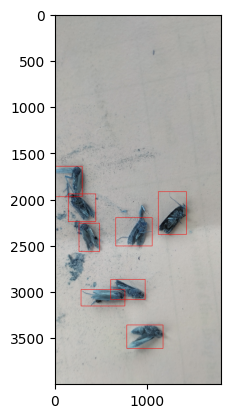

In [16]:
# view_all_bounding_boxes('id_0a9a21ea4faa8cad663e55ac.jpg')
view_all_bounding_boxes('id_5c6314cf6eb709c0a5c585eb.jpg')